### features:
* spectogram coef
* zero crossing rate
* selected chromogram values
* selected tempogram values
* wavelet levels

In [1]:
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
import itertools

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
path = "/Users/ecem/Desktop/phonocardiogram/data/wavelet_4"

## Load data

Here, our target is to predict disease of patients with multiple diseases. So; our y will be disease column of two column indicatin geach patients disease.

In [3]:
av = pd.read_csv(path + "/p_value_selected_AV_wavelet_4.csv", index_col = 0) #1245,474
av

,795,1923,2054,1288,1289,2445,784,1041,1043,916,...,1507,19938,7148,15853,18415,11250,6132,6135,6136,7674
0,-0.012987,0.049155,0.162484,-0.006909,-0.003095,-0.020050,0.040107,-0.022549,0.050504,-0.012326,...,0.000010,-0.000007,9.633062e-06,-1.989654e-06,1.877849e-05,5.654001e-07,0.000006,-1.900230e-05,-0.000007,-0.000004
1,0.059908,-0.128622,0.123915,0.099551,0.126385,0.075044,-0.027280,0.037997,0.035806,0.058702,...,-0.000006,-0.000003,7.260300e-06,1.478550e-05,2.589368e-06,9.500189e-06,-0.000012,1.557264e-05,0.000003,0.000007
2,0.041422,-0.085220,0.175236,-0.092746,-0.093653,-0.005534,-0.014274,-0.020097,-0.024494,-0.003444,...,0.000004,-0.000002,-1.766137e-06,2.129818e-07,-1.912296e-06,7.268966e-06,-0.000002,-3.207606e-07,-0.000002,0.000003
3,-0.029016,-0.046664,-0.032055,0.006404,0.052930,0.011552,0.043482,0.036969,0.015785,0.108686,...,-0.000005,-0.000009,6.371411e-07,-7.485432e-06,1.297471e-06,1.667978e-05,-0.000005,4.499962e-06,0.000005,-0.000003
4,-0.164242,-0.225025,0.036199,0.014735,-0.061344,-0.000532,-0.095662,-0.144801,0.027176,0.157455,...,0.000027,-0.000002,-4.941830e-07,6.914022e-06,8.027347e-06,3.798626e-05,-0.000003,1.934357e-06,0.000001,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,-0.069889,-0.020550,-0.094110,0.183124,-0.039169,-0.116286,-0.141397,0.045367,0.043690,-1.185749,...,0.000012,-0.000003,8.193806e-05,-3.096822e-06,-8.607050e-06,-1.203339e-05,0.000008,-4.257832e-06,-0.000001,-0.000014
1241,0.325010,-0.354209,-2.632352,-0.177512,-0.156574,-1.284936,-0.083539,0.158758,0.118070,-0.215501,...,-0.000005,-0.000026,-9.709227e-06,7.144685e-05,-3.162364e-06,2.243032e-06,0.000002,-3.910973e-07,0.000001,-0.000002
1242,-0.116750,-1.144772,-0.149294,0.185980,0.091047,-0.446537,-0.008295,-0.259606,-0.356725,0.197367,...,-0.000008,-0.000069,5.701557e-06,-1.208251e-05,3.254449e-06,-2.708309e-05,0.000003,6.828923e-07,-0.000002,-0.000005
1243,0.069577,-0.280726,0.096599,-0.817650,-0.697578,-0.023586,0.157723,-0.037578,0.073947,-0.165268,...,0.000013,-0.000003,-2.668425e-05,-4.111385e-05,5.033799e-07,-1.212209e-05,0.000009,-1.241360e-05,-0.000009,-0.000023


In [4]:
mv = pd.read_csv(path + "/p_value_selected_MV_wavelet_4.csv", index_col = 0) #1080, 474
mv

,795,1923,2054,1288,1289,2445,784,1041,1043,916,...,1507,19938,7148,15853,18415,11250,6132,6135,6136,7674
0,0.004048,-0.033169,0.007490,0.021383,0.008824,-0.041601,0.000468,-0.013121,0.027003,0.034922,...,0.000001,-7.512805e-06,1.498207e-06,2.390967e-06,-0.000019,5.465554e-06,-3.892710e-07,-0.000003,5.881884e-07,-3.232271e-06
1,-0.017032,-0.001679,0.011455,-0.017736,0.011523,0.047402,-0.023793,-0.060320,-0.063695,0.021053,...,0.000001,1.874099e-06,1.323278e-07,9.641954e-07,-0.000069,-3.899040e-07,-6.911436e-06,0.000008,4.042908e-06,-7.805880e-06
2,0.012119,-0.018151,0.034506,0.011571,0.028052,0.058676,0.023004,0.025776,0.008118,-0.013687,...,0.000006,4.251662e-06,-8.553383e-06,5.979382e-07,0.000004,1.278990e-06,1.394990e-06,0.000003,-3.989378e-06,-1.929657e-07
3,-0.686173,0.001668,-0.001524,0.008263,-0.009499,-0.028766,-0.039727,0.014155,-0.010631,-0.004768,...,-0.000008,1.814973e-06,7.224502e-06,-8.958159e-07,0.000003,-5.185429e-07,-6.018381e-07,-0.000003,4.102127e-06,9.934731e-06
4,-0.051929,0.072574,-0.096351,0.009297,-0.001149,-0.007404,-0.033319,0.006988,-0.017905,-0.013523,...,-0.000011,-6.419332e-07,-3.449604e-06,1.466363e-05,0.000006,-5.535781e-06,-9.742886e-06,0.000007,3.446941e-06,-1.025759e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-0.092358,0.769148,0.300497,-0.500603,-0.313615,-0.134193,0.104026,0.255119,-0.698435,0.089041,...,-0.000009,-2.785237e-06,5.179376e-06,1.719454e-06,-0.000012,7.478171e-06,-1.215050e-05,0.000002,2.425862e-05,7.261649e-06
1076,0.172275,0.884502,-0.541508,0.602845,0.335704,0.062623,0.079562,0.122768,0.219474,-0.011166,...,0.000004,-9.785523e-06,-2.320076e-05,-1.342467e-05,0.000002,1.640944e-05,-9.650408e-06,0.000014,3.483787e-06,-3.063120e-05
1077,0.040663,0.470253,-0.319456,-0.571286,-0.593082,-0.039066,-0.013840,-0.004968,0.000329,0.033159,...,0.000005,2.424058e-05,-5.070899e-06,-4.739268e-06,-0.000011,2.489355e-05,-7.414783e-06,-0.000003,8.854840e-06,-7.010094e-06
1078,-0.003271,0.503375,-0.215927,0.283983,0.613698,0.049748,0.077207,0.016188,0.000118,-0.089892,...,0.000002,1.295633e-05,2.035667e-06,-1.605311e-04,0.000014,7.345225e-06,-2.658111e-06,0.000006,-3.537396e-06,-1.656555e-05


In [5]:
pv = pd.read_csv(path + "/p_value_selected_PV_wavelet_4.csv", index_col = 0) #1198, 474
pv

,795,1923,2054,1288,1289,2445,784,1041,1043,916,...,1507,19938,7148,15853,18415,11250,6132,6135,6136,7674
0,0.019976,-0.026902,-0.021318,0.001288,0.335727,-0.102101,0.014204,0.117020,-0.058212,-0.125709,...,0.000019,1.600329e-05,-0.000017,5.979149e-06,-1.259381e-05,0.000004,-7.921481e-07,3.654277e-07,0.000004,-3.718887e-07
1,-0.129105,0.046617,-0.043986,0.069720,0.056352,-0.132116,0.422354,0.040351,0.023048,-0.091638,...,-0.000007,7.754832e-06,-0.000009,9.567375e-07,1.178331e-05,0.000037,3.332761e-05,-3.095578e-05,-0.000010,-6.413102e-06
2,-0.083114,0.503810,0.002297,0.095826,0.172285,0.022020,0.196808,-0.025036,-0.003613,-0.372029,...,0.000002,-1.535431e-06,-0.000005,-1.500244e-06,-9.309062e-06,-0.000009,-1.444318e-05,1.080532e-05,0.000013,-8.003553e-07
3,-0.226540,0.004400,0.095760,0.230004,0.507743,0.036986,0.065725,-0.118098,-0.167257,0.023122,...,-0.000004,-5.423324e-06,-0.000013,-1.952238e-05,-3.306419e-05,-0.000002,1.273467e-05,-1.501525e-05,-0.000009,4.835834e-06
4,-0.289132,0.162990,0.051744,-0.037033,-0.067593,0.027545,-0.019982,-0.002471,-0.046122,0.051377,...,0.000002,1.467904e-05,-0.000012,1.602320e-05,-5.009089e-06,0.000014,4.496018e-06,-4.268659e-06,0.000013,-2.353800e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,-0.010048,0.094819,-0.060954,-0.173731,-0.190498,0.028940,0.035414,0.139658,0.126717,-0.044056,...,0.000038,1.158844e-05,-0.000007,4.061731e-05,7.322778e-07,-0.000019,-2.054212e-05,8.029951e-06,0.000021,7.631810e-06
1194,-0.073287,0.015468,0.104962,-0.010597,-0.127677,-0.025079,0.053189,-0.014588,-0.011621,0.081606,...,0.000014,7.361959e-06,0.000014,1.038308e-05,1.640083e-05,0.000005,6.692950e-06,-8.985837e-06,-0.000001,8.450152e-07
1195,0.821568,0.031902,0.005297,-0.107575,-0.075537,0.047936,0.010796,0.001245,-0.030641,0.022241,...,-0.000020,2.210960e-05,-0.000062,-1.713692e-06,1.197442e-05,-0.000020,1.866197e-05,-2.844252e-05,-0.000013,3.244729e-05
1196,-0.131931,0.000953,0.079995,-0.007795,-0.015567,-0.208057,0.041677,-0.022329,-0.040281,0.070546,...,0.000010,9.645475e-06,-0.000023,-1.110366e-05,-4.228175e-05,0.000017,-1.627923e-05,1.555303e-05,0.000005,4.961155e-06


In [6]:
tv = pd.read_csv(path + "/p_value_selected_TV_wavelet_4.csv", index_col = 0) #1205, 474
tv

,795,1923,2054,1288,1289,2445,784,1041,1043,916,...,1507,19938,7148,15853,18415,11250,6132,6135,6136,7674
0,-0.013282,-0.037843,0.018358,0.031792,0.014754,-0.006657,0.001505,0.008517,0.003562,-0.004460,...,4.509682e-06,2.037268e-06,0.000007,-0.000004,-2.074810e-05,-5.594084e-07,-1.420856e-05,0.000009,1.501759e-05,1.539488e-05
1,0.144713,-1.770772,-0.008974,0.008981,-0.004513,0.015174,-0.353016,0.016941,0.025244,0.019028,...,-1.796983e-05,3.224588e-06,0.000002,0.000021,9.002586e-06,2.778106e-05,-1.175070e-05,0.000018,5.668611e-06,2.054556e-06
2,-0.031628,0.011649,-0.001330,0.014364,-0.024359,0.052176,-0.034203,0.003069,-0.006787,0.059075,...,1.434048e-06,1.030014e-05,-0.000018,0.000014,-4.297646e-06,2.902379e-06,-6.659448e-06,0.000007,1.267249e-05,5.876849e-06
3,0.038500,-0.020967,0.011034,0.157517,0.172896,0.037736,0.007232,0.046508,-0.051282,-0.007887,...,-6.438859e-07,5.606504e-06,0.000002,0.000004,-6.991701e-06,6.814254e-06,-2.528350e-06,-0.000003,9.914220e-07,6.299524e-07
4,0.011594,-0.007075,-0.013508,-0.040250,0.027871,-0.015706,0.164881,0.493109,0.246292,0.025818,...,1.952489e-06,1.392451e-06,-0.000002,-0.000001,-4.754067e-06,1.860825e-05,1.276545e-04,0.000415,1.671584e-04,4.072445e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0.734989,0.140633,-1.116910,1.158167,1.154759,0.503692,-2.077086,0.131757,0.226112,0.148187,...,-3.133900e-06,7.340685e-06,0.000002,-0.000017,2.378179e-05,1.202943e-05,4.644971e-06,-0.000006,-8.447096e-06,5.702488e-06
1201,0.964176,-0.320181,-0.078887,-0.318060,-0.230499,1.027791,-0.123357,-0.098610,-0.219342,-0.500937,...,-2.795877e-05,-9.944662e-06,0.000005,0.000003,-1.720665e-05,7.488299e-06,1.352560e-05,-0.000023,-2.745539e-06,4.586997e-06
1202,0.893953,0.528525,-0.032031,0.049651,-0.259393,-1.819503,0.874410,0.357051,0.172326,0.333675,...,-2.783292e-05,7.048482e-06,-0.000009,-0.000003,-1.262734e-05,2.332377e-05,-5.225651e-06,-0.000002,3.663823e-06,-1.320010e-05
1203,0.138146,-0.937512,-0.655027,-0.030698,-0.015212,0.150846,0.573690,1.442215,1.016717,0.120015,...,1.814100e-06,1.101103e-05,0.000017,0.000011,6.600749e-08,3.823952e-06,7.054769e-07,0.000006,-6.057322e-06,-1.820270e-06


In [7]:
labels = np.concatenate((np.zeros((1245)),np.ones((1080)),np.ones((1198))*2, np.ones((1205))*3), axis = 0)
labels.shape

(4728,)

In [8]:
df = pd.concat([av,mv,pv,tv], axis = 0)

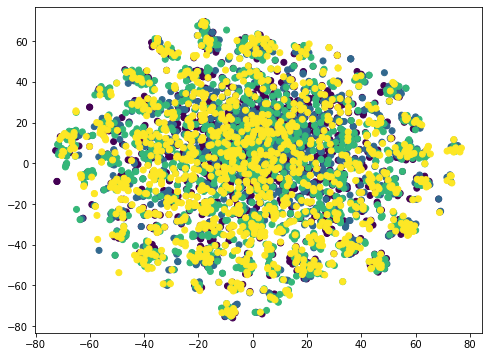

In [9]:
from sklearn.manifold import TSNE
fig = plt.figure(figsize=(8,6));
X_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity = 10).fit_transform(df)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c = labels)
plt.show()